In [1]:
import os
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import plot_graph, prepare_graph
from src.crud import get_author_to_author, get_distinct_authors
from src.config import get_db_connection
USE_MINI = True

In [2]:
if USE_MINI:
    db_path = "../../../data/twitter_small.db"
else:
    db_path = "../../../data/twitter.db"
con = get_db_connection(db_path=db_path, use_dict_reponses=False)
retweet_edges = get_author_to_author(con, response_type="retweeted")
reply_edges = get_author_to_author(con, response_type="replied_to")
con.close()
con = get_db_connection(db_path=db_path)
authors = get_distinct_authors(con)
con.close()
print(f"num vertices: {len(authors)}")
print(reply_edges[:3])
pd.DataFrame(retweet_edges).head()

num vertices: 12327
[('307001802', '41077970'), ('2349646720', '130509788'), ('1113348072', '122441438')]


,0,1
0,316617952,131574396
1,249138797,956564946
2,2303926190,1630896181
3,3257311380,19834403
4,562385224,131574396


# Part 1

In [3]:
retweet_graph = ig.Graph(len(authors))
retweet_graph["title"] = "Retweet network"
retweet_graph.vs["name"] = authors
retweet_graph.add_edges(retweet_edges)
retweet_graph.simplify()
retweet_graph.summary()
retweet_graph, rt_layout = prepare_graph(
    retweet_graph,
    layout=retweet_graph.layout_fruchterman_reingold(niter=150)
)

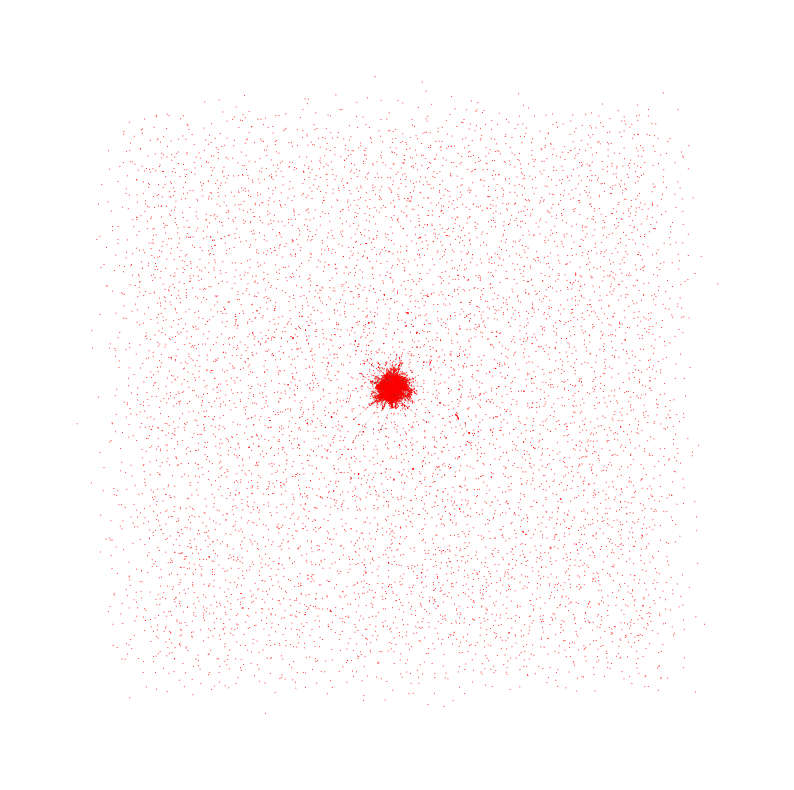

In [4]:
plot_graph(retweet_graph, layout=rt_layout)

In [5]:
reply_graph = ig.Graph(len(authors))
reply_graph["title"] = "reply network"
reply_graph.vs["name"] = authors
reply_graph.add_edges(reply_edges)
reply_graph.simplify()
reply_graph.summary()
reply_graph, rp_layout = prepare_graph(
    reply_graph,
    layout=reply_graph.layout_fruchterman_reingold(niter=100),
)

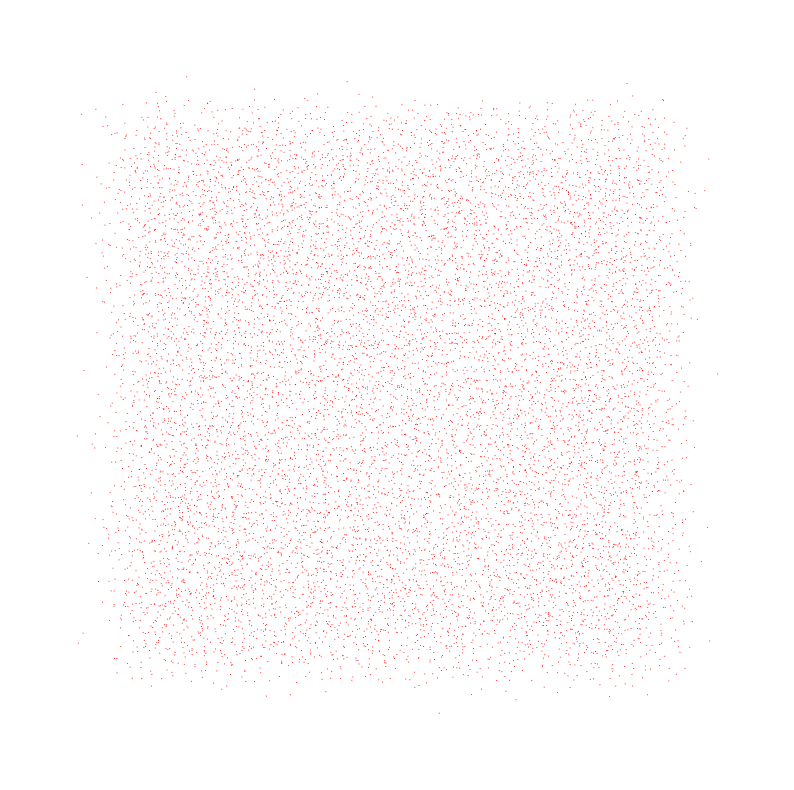

In [7]:
plot_graph(reply_graph, layout=rp_layout)